In [ ]:
## Challenge 2 Customer Churn Prediction

Kelompok = DS3-13 \\
Anggota  = Adek Dwiyanto

Direktori kerja dan direktori file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


atau dengan cara ini untuk input file data dari user:

In [ ]:
from google.colab import files
uploaded = files.upload()

Mengimport library/module/dependecies

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score


Mengambil data dari direktori google drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Challenge 2 Binar/data/Data Train.csv')

Melihat dimana working directory sekarang (cd)

In [ ]:
cd = os.getcwd()

print("Current Working Directory:", cd)

Current Working Directory: /content/drive/MyDrive/Challenge 2 Binar/data


Pindah working directory dulu

In [ ]:
tujuan = '/content/drive/MyDrive/Challenge 2 Binar/data'
os.chdir(tujuan)
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/drive/MyDrive/Challenge 2 Binar/data


Melihat info dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Preview dataframe-nya

In [ ]:
df.head(10)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


Melihat banyaknya jenis/unik data




In [ ]:
df.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

Menghapus beberapa feature yang bersifat 'label' karena sepertinya tidak dibutuhkan di proses


In [ ]:
df.drop(columns=['state', 'area_code'], inplace=True)
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


Mengubah data yang bersifat boolean yes atau no menjadi 1 atau 0 secara berurutan (sesuai di deskripsi kaggle), agar bisa diproses

In [ ]:
df.replace({'international_plan':{'yes':1, "no":0}, 'voice_mail_plan':{'yes':1, "no":0}, 'churn':{'yes':1, "no":0}}, inplace=True)
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


Cek tipe datanya sekarang apakah sudah numerikal semua

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   number_vmail_messages          4250 non-null   int64  
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

Sekarang melihat datanya secara preview statistik

In [ ]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Melihat jumlah missing value tiap feature


In [ ]:
df.isna().sum()

# ternyata tidak ada missing value, sesuai dengan yang terlihat pada saat df.describe

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Melihat kondisi distribusi data dengan grafik


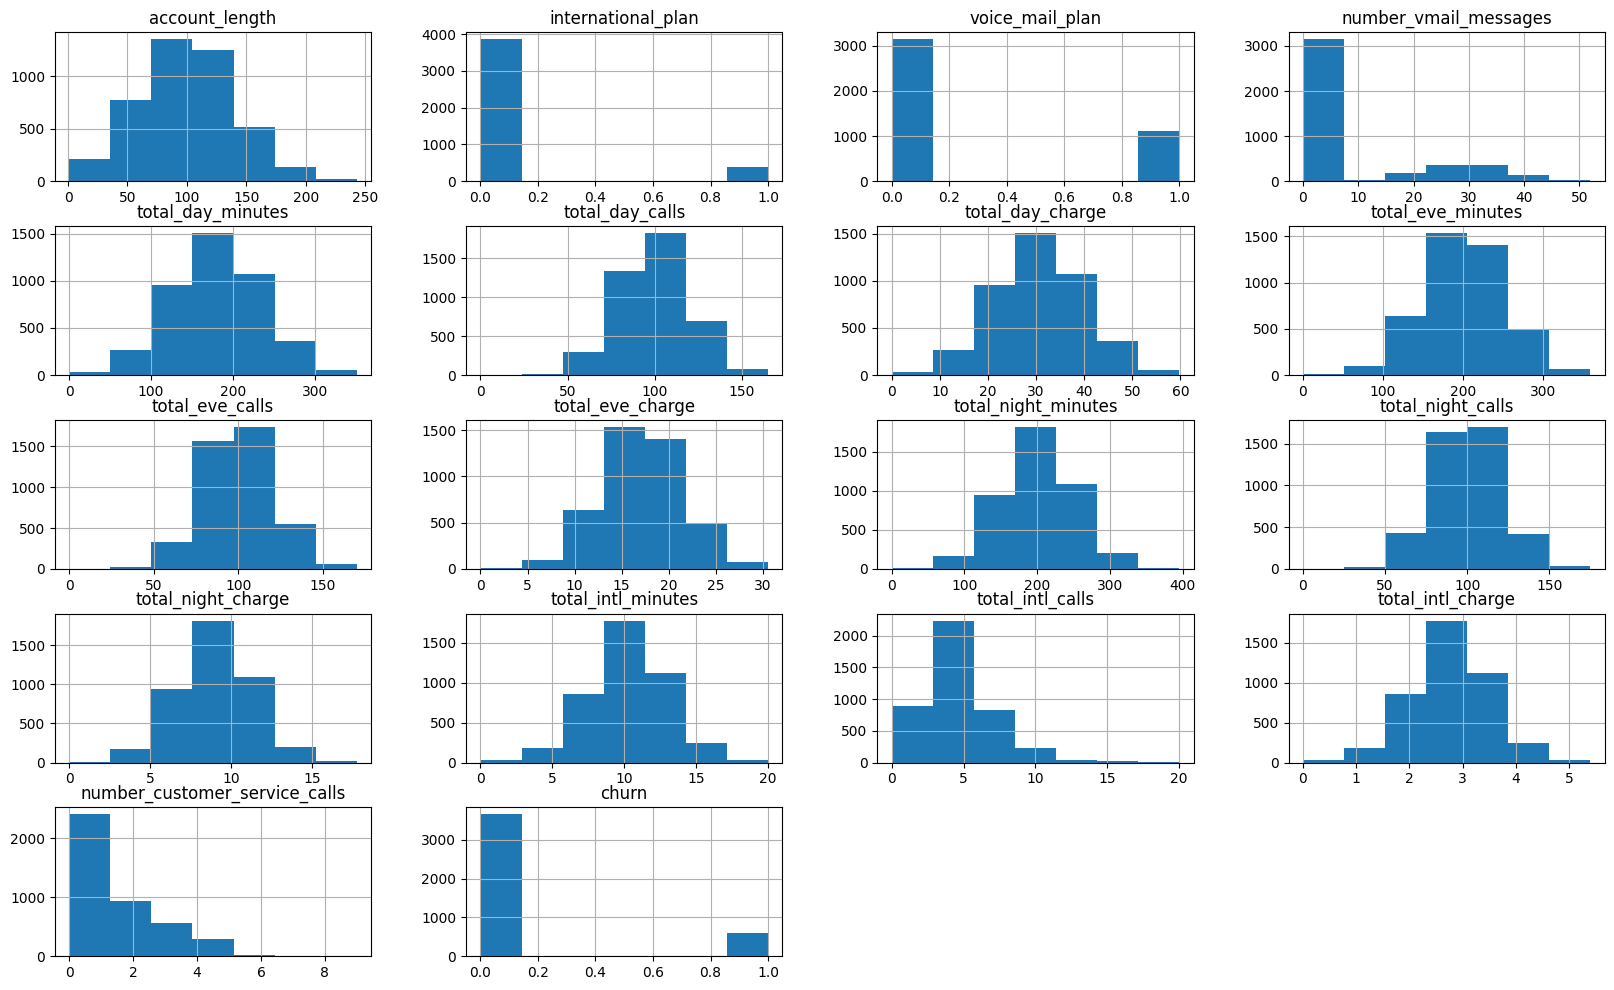

In [ ]:
df.hist(figsize=(20,12), bins=7)
plt.show()


Mengecek kesamaan/hubungan tiap feature

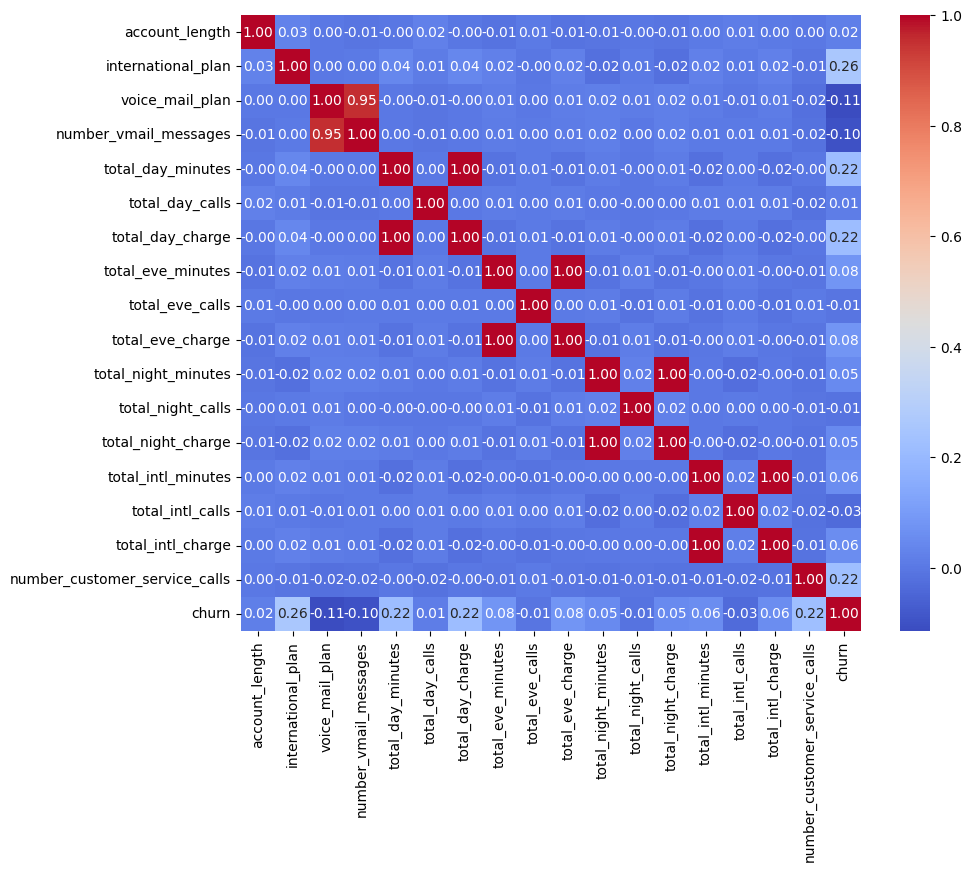

In [ ]:
matriks = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriks, annot=True,
            cmap='coolwarm', fmt=".2f")
plt.show()

Mengecek dimana outliers dengan bantuan boxplot

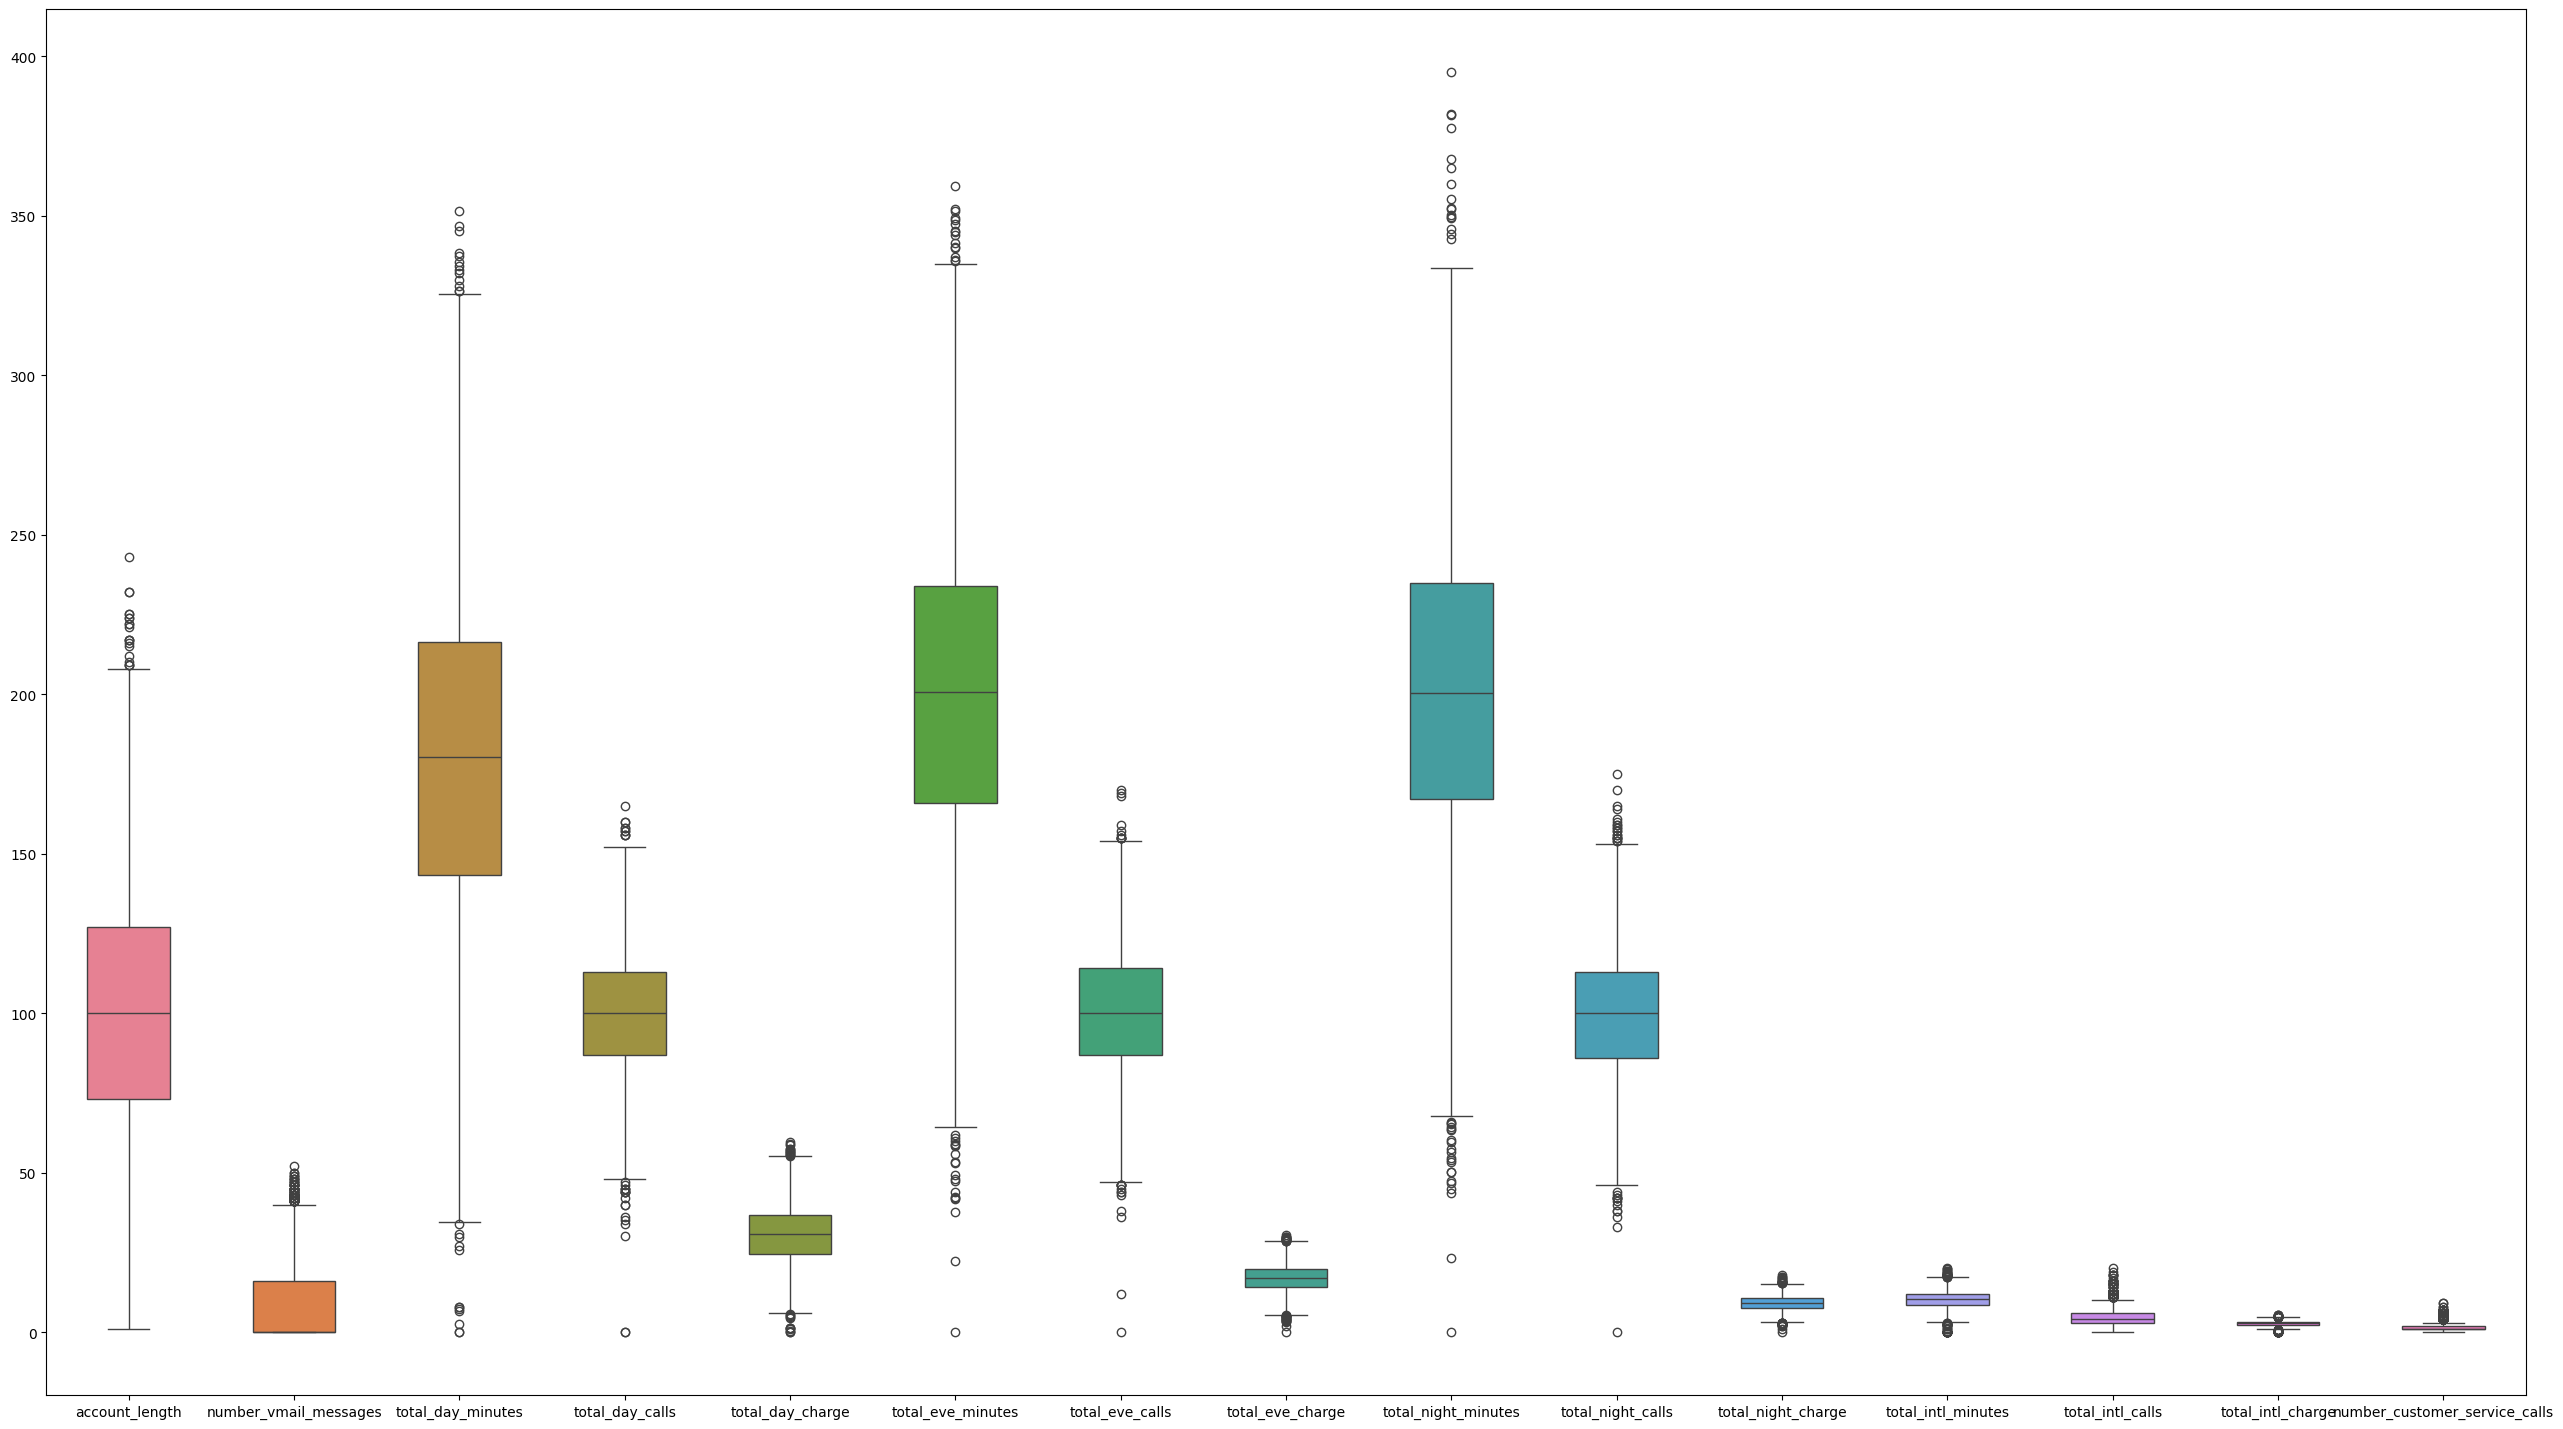

In [ ]:
plt.figure(figsize=(32, 18))  # Set the figure size
sns.boxplot(df[['account_length',	'number_vmail_messages',
                'total_day_minutes',	'total_day_calls',
                'total_day_charge',	'total_eve_minutes',
                'total_eve_calls',	'total_eve_charge',
                'total_night_minutes',	'total_night_calls',
                'total_night_charge',	'total_intl_minutes',
                'total_intl_calls',	'total_intl_charge',
                'number_customer_service_calls']], width=0.5)
plt.show()

Melihat lagi untuk number_vmail_messages

<Axes: ylabel='number_vmail_messages'>

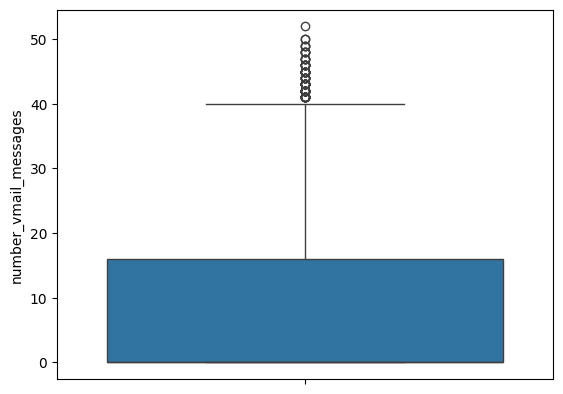

In [ ]:
sns.boxplot(df['number_vmail_messages'])

Modelling, pertama di drop dulu feature 'churn' agar tidak diikutkan di model karena merupakan target feature

In [ ]:
X = df.drop("churn", axis=1)
y = df["churn"]

Lalu datanya di split untuk menghindari overfitting (sepertinya)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (3400, 17)
Ukuran X_test: (850, 17)
Ukuran y_train: (3400,)
Ukuran y_test: (850,)


Kemudian menerapkan model dengan parameter default (basic).

Pertama menerapkan dengan model XGBOOST

In [ ]:
xgb_clf = XGBClassifier(random_state=42)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)

print("Akurasi XGB:", xgb_accuracy)
print("F1 Score untuk XGB:", xgb_f1)
print("Precision untuk XGB:", xgb_precision)
print("Recall untuk XGB:", xgb_recall)


Akurasi XGB: 0.9658823529411765
F1 Score untuk XGB: 0.8806584362139916
Precision untuk XGB: 0.9385964912280702
Recall untuk XGB: 0.8294573643410853


Dengan menggunakan model Randomforestclassifier




In [ ]:
rfc_clf = RandomForestClassifier(random_state=42)

rfc_clf.fit(X_train, y_train)
y_pred = rfc_clf.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred)
rfc_recall = recall_score(y_test, y_pred)

print("Akurasi RFC:", rfc_accuracy)
print("F1 Score untuk RFC:", rfc_f1)
print("Precision untuk RFC:", rfc_precision)
print("Recall untuk RFC:", rfc_recall)




Akurasi RFC: 0.9588235294117647
F1 Score untuk RFC: 0.849785407725322
Precision untuk RFC: 0.9519230769230769
Recall untuk RFC: 0.7674418604651163


Dengan menggunakan model GradientBoostingClassifier


In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)

gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)

print("Akurasi GB:", gb_accuracy)
print("F1 Score untuk GB:", gb_f1)
print("Precision untuk GB:", gb_precision)
print("Recall untuk GB:", gb_recall)


Akurasi GB: 0.96
F1 Score untuk GB: 0.8583333333333333
Precision untuk GB: 0.9279279279279279
Recall untuk GB: 0.7984496124031008


Hasil matriks pengukuran dari ke-3 model disajikan dengan masing-masing 4 matriks yaitu :
1. accuracy_score,
2. f1_score,
3. precision_score,
4. recall_score

Namun dari studi kasus untuk mengetahui customer churn, akan lebih baik apabila nilai False Positive (FP) lebih besar daripada False Negative (FN).

Karena akan lebih baik apabila customer diprediksi churn namun kenyataannya customer tetap retain

Sehingga dari ke-3 model, yang paling representatif untuk kasus customer churn adalah dilihat dari yang hasil matriks Recallnya terbesar (karena titik beratnya lebih baik False Positive).

Oleh karena itu model XGBOOST lah yang terbaik.

Melakukan hyperparameter tuning dengan Grid Search, dengan beberapa parameter seperti n_estimators dll.

In [ ]:
parameter = {
    'n_estimators': [100, 200, 300],
    'max_depth': (3, 5, 7),
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

clf = GridSearchCV(xgb_clf, parameter, return_train_score=True, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

print("Nilai parameternya:", clf.best_params_)
best_model = clf.best_estimator_

Nilai parameternya: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


Selanjutnya kita melihat/sortir 3 hasil terbaik/teratas (ascending=False) dari kombinasi parameter tuning nya

In [ ]:
cv_result = pd.DataFrame.from_dict(clf.cv_results_)
cv_result.sort_values(by='mean_test_score', ascending=False)[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
53,0.410626,0.015915,0.010436,0.000173,0.2,7,300,1.0,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.952941,...,0.957941,0.003168,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
51,0.319887,0.014976,0.009267,0.000302,0.2,7,200,1.0,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.952941,...,0.957941,0.003168,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
32,0.383074,0.013678,0.009617,0.000132,0.1,7,200,0.8,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.954412,...,0.957647,0.003275,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Kita coba aplikasikan kombinasi parameter teratas tadi, yaitu :
1. learning_rate (param_learning_rate): 0.2,
2. max_depth (param_max_depth): 7,
3. n_estimators (param_n_estimators): 300,
4. subsample (param_subsample): 1.0

ke model XGBOOST lagi

In [ ]:
xgb_clf_new = XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0, random_state=42)
xgb_clf_new.fit(X_train, y_train)
y_pred = xgb_clf_new.predict(X_test)

xgb_new_accuracy = accuracy_score(y_test, y_pred)
xgb_new_f1 = f1_score(y_test, y_pred)
xgb_new_precision = precision_score(y_test, y_pred)
xgb_new_recall = recall_score(y_test, y_pred)

print("Akurasi Baru XGB:", xgb_new_accuracy)
print("F1 Score Baru untuk XGB:", xgb_new_f1)
print("Precision Baru untuk XGB:", xgb_new_precision)
print("Recall Baru untuk XGB:", xgb_new_recall)

Akurasi Baru XGB: 0.9670588235294117
F1 Score Baru untuk XGB: 0.884297520661157
Precision Baru untuk XGB: 0.9469026548672567
Recall Baru untuk XGB: 0.8294573643410853


Selanjutnya kita melihat feature mana yang lebih berpengaruh untuk kepentingan masukan (input) proses prediksi ke depannya, dengan menggunakan feature_importance

<Figure size 1000x600 with 0 Axes>

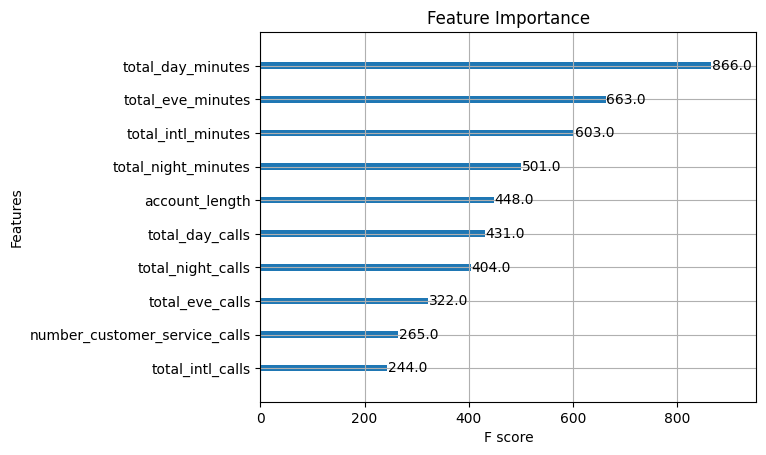

In [ ]:
plt.figure(figsize=(10, 6))
feature_importance = plot_importance(xgb_clf_new, max_num_features=10)
plt.title("Feature Importance")
plt.show()

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Challenge 2 Binar/data/Data Test.csv')

# pertama disesuaikan dulu featurenya (disamakan dengan data train)
data_test.drop(columns=['id','state', 'area_code'], inplace=True)
data_test.replace({'international_plan':{'yes':1, "no":0}, 'voice_mail_plan':{'yes':1, "no":0}, 'churn':{'yes':1, "no":0}}, inplace=True)


# melakukan prediksi menggunakan file "Data Test.csv"
prediksi = xgb_clf_new.predict(data_test)

list_prediksi = []
for value in prediksi:
  if value == 1:
    list_prediksi.append("yes")
  else:
    list_prediksi.append("no")

data_prediksi = pd.DataFrame({'Prediction': list_prediksi})

# disimpan ke file predictions.csv
data_prediksi.to_csv('predictions.csv', index=False)